# Tarea Unidad 3 - Aprendizaje Supervisado

Fecha de entrega: **Viernes 11 de Junio de 2021 a las 23:59**.

- Consultas por slack o al correo felipe dot quezada at uach dot cl
- 4 integrantes como maximo.

Integrantes:
Integrantes:
- Francisco Levín
- Enzo Marin
- Franco Bocca
- Rodrigo Zambrano

La tarea consiste en resolver 2 problemas utilizando los contenidos vistos hasta ahora. En la carpetas `2/` se encuentran el dataset para el segundo problema. Para el primero problema, existe un link a un archivo compartido en google drive, que se encuentra mas abajo.

In [1]:
%matplotlib notebook
import ipywidgets as widgets #Widgets de python UI
import numpy as np # Numpy
import matplotlib.pyplot as plt #Matplotlib (gráficar)
from matplotlib import animation #Animaciones
from functools import partial 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd #Pandas
slider_layout = widgets.Layout(width='700px', height='50px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)

# 1: Clasificacion de Asteroides

**ALERTA! IMPACTO DE ASTEROIDE!** La nueva base espacial de Pluton esta constatemente bajo ataque de asteroides provenientes de un agujero blanco cercano. No son asteroides muy grandes, pero si han causado importantes danos en la infraestructura. Por esta razon, la Union Intergalactica Terrestre le ha pedido a usted, como experto en aprendizaje supervisado, hacerse cargo del problema. La base cuenta con equipamiento especial para detectar y pulverizar a los asteroides, sin embargo, como los recursos son limitados, se debe usar correctamente. Las caracteristicas del asteroide se pueden calcular al instante con instrumentos especializados, solo hace falta alguna manera de poder utilizar esa informacion y predecir cuando son peligrosos y cuando no.

Para lograr la tarea, se ha puesto a su dispocision un listado de asteroides con sus caracteristicas y su etiqueta. El dataset esta compuesto por los siguientes campos:

- name: Nombre del asteroide
- a: Eje semi-mayor (grad)
- e: excentricidad (km)
- i: Inclinacion con respecto al plano eliptico x-y (grados)
- om: Longitud en el nodo ascendente (km)
- w: Valor de Perihelio (km)
- q: Distancia de Perihelio (km)
- ad: Distancia de Afelio (km)
- per_y: Periodo orbital (años)
- data_arc: Usado para cruzar info.
- condition_code: condicion del asteroide. De peor a mejor: 0, 1, 2, 3, 4, 5, 6, 7, D, E
- n_obs_used: numero de mediciones
- H: parametro de Magnitud Absoluta
- pha: VARIABLE OBJETIVO, pregunta, el asteroide presenta un peligro? N o Y
- diameter: Diametro (km)
- extent: extencion (km x km x km)
- albedo: porcentje de radiacion reflejada (Bq)
- rot_per: velocidad rotacion (m/s)
- GM: Masa global (m)
- BV: Volumen (m3)
- UB: Cantidad de Ultravioleta reflejada (Bq)
- IR: Cantidad de IR reflejados (Bq)
- G: Gravedad esperada (m/s2)
- moid: ID interno para cruzar datos
- class: Tipo de asteroide, 0, 1, 2, 3, 4, 5, 6, 7
- n: Rotacion (grados/dias)
- per: Periodo orbital (dias)
- ma: Anomalia media en grados.

**Objetivo Principal**
- Entrenar un Regresor Logistico capaz de predecir si el asteroide es peligroso o no.

El dataset se encuentra en: 

https://drive.google.com/file/d/1g_7HvzXQCtZ57X3inevTE4mQ49gZU6FW/view?usp=sharing


Para esto debe utilizar todos los contenidos vistos en la unidad. Esto incluye, pero no se limita a limpiar, preprocesar y segregar el dataset, entrenar y evaluar el modelo, etc... Cada decision que pueda ser considerada importante debe ser justificada, es decir, debe explicar por que no esta haciendo las cosas de otra manera. Recuerde, analize correctamente los datos, y sea consciente de lo que este haciendo su codigo para evitar errores *paranormales*. Finalmente debe terminar con un resumen de los principales desafios y resultados, comentando los resultados en funcion de las metricas vistas en clase. Para el Accuracy, comentar por que cree que obtuvo ese resultado.


In [3]:
#Dataframe asteroides.csv
df = pd.read_csv("Asteroides.csv", sep=";", low_memory=False)
display(df)
df.shape

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,GM,BV,UB,IR,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,62.6284,0.713,0.426,NaN,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,14.3,0.635,0.284,NaN,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,NaN,0.824,0.433,NaN,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,17.8,0.782,0.492,NaN,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,NaN,0.826,0.411,NaN,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


(839714, 28)

In [4]:
df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,albedo,rot_per,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,...,136409.000000,18796.000000,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155888,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,...,129.564074,21.864177,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.232258,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,...,109.452251,75.416559,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,...,0.010000,0.004389,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091455,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,...,53.000000,4.233000,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,...,78.000000,6.683000,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199401,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,...,188.000000,12.729375,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,194.000000,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,...,994.000000,3240.000000,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


In [5]:
df.isnull().sum(axis=0)

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [6]:
#Eliminamos columnas en los que la mayoría de sus observaciones sean nulas para trabajar los datos 

dfnew = df.drop(['name', 'albedo', 'rot_per','extent','diameter','IR', 'GM','UB','BV', 'G'], axis=1)

In [7]:
#Renombramos variables para una mejor observación de los datos

dfnew = dfnew.rename(columns = {'a': 'eje_medio', 'e': 'excentr', 'i': 'inclina', 
                                'om': 'long_nodo_asc', 'w':'val_perihel', 'q':'dist_perihel', 
                                'ad': 'dist_afel', 'per_y': 'per_years', 'H': 'param_magnitud_abs', 
                                'n': 'rotacion_grad', 'ma': 'anom_media'})

dfnew

,eje_medio,excentr,inclina,long_nodo_asc,val_perihel,dist_perihel,dist_afel,per_years,data_arc,condition_code,n_obs_used,param_magnitud_abs,pha,moid,class,rotacion_grad,per,anom_media
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,0.032397,APO,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,0.680220,MBA,0.290018,1241.302609,15.320134


In [8]:
#Eliminamos filas con almenos un valor null 
dfnew.dropna(inplace = True)
print(dfnew.shape)
dfnew


(820167, 18)


,eje_medio,excentr,inclina,long_nodo_asc,val_perihel,dist_perihel,dist_afel,per_years,data_arc,condition_code,n_obs_used,param_magnitud_abs,pha,moid,class,rotacion_grad,per,anom_media
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,0.032397,APO,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,0.680220,MBA,0.290018,1241.302609,15.320134


In [9]:
#Promedio para la variable objetivo 

dfnew.groupby('pha').mean()

,eje_medio,excentr,inclina,long_nodo_asc,val_perihel,dist_perihel,dist_afel,per_years,data_arc,n_obs_used,param_magnitud_abs,moid,rotacion_grad,per,anom_media
pha,,,,,,,,,,,,,,,
N,2.895157,0.155164,8.907543,168.489057,181.053558,2.410764,3.379549,6.677146,5721.999338,264.389209,16.761453,1.427236,0.236742,2438.827578,180.690607
Y,1.790081,0.531641,13.820045,173.876082,181.020102,0.760580,2.819583,2.633252,3492.567312,247.769498,20.052690,0.023652,0.530294,961.795286,180.038433


### Observaciones
- Los asteroides que no representan un peligro tienen un semi-eje mayor que los que si presentan un peligro. Esto tiene sentido ya que presentan una distancia más lejana al planeta analizado. ¿Pero que es un semi-eje mayor? Según Wikipedia: 
    - En astronomía, es equivalente a la distancia media de un objeto que orbita alrededor de otro, ya que el objeto central (por ejemplo, el Sol) ocupa uno de los focos.

- La excentricidad de los asteroides peligrosos es mayor que los que no lo son. 

- Perihelio: es el punto más cercano de la órbita de un cuerpo celeste alrededor del Sol.
- Afelio: es el punto más alejado de la órbita de un planeta alrededor del Sol.
- Los asteroides que no son peligrosos tienen una distancia de perihelio mayor a los peligrosos, y una distancia de afelio mayor igualmente. 
- El periodo orbital es el tiempo que le toma a un astro recorrer su órbita. 
- El periodo orbital de los asteroides que no son peligrosos es mucho mayor que la de los que si lo son. Esto tiene sentido si sabemos también que el semieje-mayor es más grande por lo que están a mayor distancia del planeta estudiado. 
#### La anomalía media no la terminé de entender...

Número de asteroides que son un peligro: 2013
Asteroides que no son un peligro: 818154

Probabilidad de asteroides que son un peligro: 0.245 %


<IPython.core.display.Javascript object>


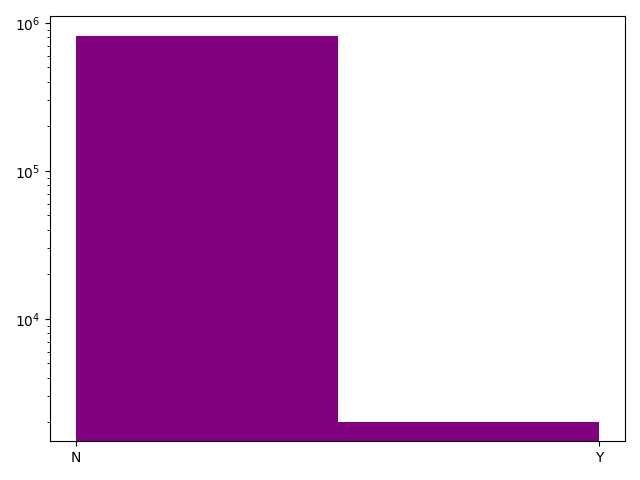

In [10]:
#número de observaciones que nos dicen si es un peligro: 2013 'Y' 

def len_yes_class(df):
    is_yes = dfnew['pha'] == 'Y'
    size = len(df.loc[is_yes])
    return {"size": size, "prob": round(size / len(df), 5)} 

size_is_yes = len_yes_class(dfnew)

print("Número de asteroides que son un peligro: {}".format(size_is_yes['size']))
print("Asteroides que no son un peligro: {}".format(len(dfnew['pha']) - size_is_yes['size']))

print("\nProbabilidad de asteroides que son un peligro: {} %".format(size_is_yes['prob'] * 100))

fig, ax = plt.subplots(tight_layout=True)
ax.set_yscale('log')
ax.hist(dfnew['pha'], bins=2, color=['purple']);


### Desbalanceo de clases
Al observar el histograma podemos notar claramente que nuestras clases de la variable objetivo se encuentran **desbalanceadas**. Tenemos que 0.245 % de los datos (2013 datos) son 'Y', lo que quiere decir que son un peligro. Por lo que es necesario aplicar un balanceo en las clases, de otro modo, este solo aprenderá a reconocer bien la clase mayoritaria y la clase minoritaria (que en este caso es la que más nos concierne) tenderá a arrojarnos falsos positivos y falsos negativos, que es lo que se intenta evitar. 

<IPython.core.display.Javascript object>


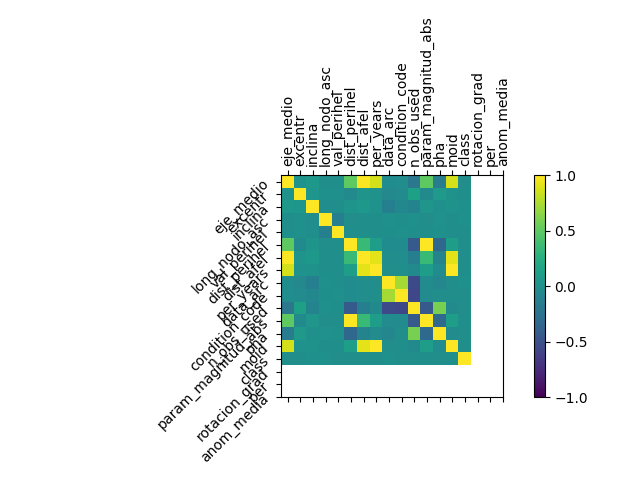

,eje_medio,excentr,inclina,long_nodo_asc,val_perihel,dist_perihel,dist_afel,per_years,data_arc,condition_code,n_obs_used,param_magnitud_abs,pha,moid,class,rotacion_grad,per,anom_media
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,0.032397,APO,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,0.680220,MBA,0.290018,1241.302609,15.320134


In [10]:
#Correlación entre variables

import matplotlib.cm as cm
fig, ax = plt.subplots(tight_layout=True)
f = ax.matshow(dfnew.corr(), vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(dfnew.columns)))
ax.set_yticks(np.arange(len(dfnew.columns)))

ax.set_xticklabels(dfnew.columns,rotation=90)
ax.set_yticklabels(dfnew.columns,rotation=45)


fig.colorbar(f, ax=ax);
#¿por qué se ve así? wtf

dfnew

### Codificación de variables categóricas 
Luego de eliminar datos y columnas que nos dificultarían poder predecir el resultado del estudio en base a nuestro modelo pasamos a definir como codificar las variables categóricas que se presentan en los datos. En este caso tenemos que la variable objetivo 'pha' tiene valores binarios pero de forma categórica ('N' y 'Y'), por lo que decidimos que la codificación Label Encoding es la más adecuada debido a su simplicidad al definir 'N' como 0 y 'Y' como 1. Por otra parte tenemos la variable categórica 'class' que define el tipo de asteroide, sin embargo, esta variable tiene 12 tipos de elementos distintos, por lo que no sería buena idea utilizar Label Encoding debido a que al asignar números en un orden arbitrario el modelo podría malinterpretar estos datos como si estuvieran en orden, por lo que para la variable 'class' decidimos usar target encoding modificado ([additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)). 

- El motivo por el cual usamos una codificación de target encoding modificada es debido a que esta codificación asigna valores a los distintos elementos de la variable categórica según la media correspondiente de la variable objetivo. Esto en algunos casos puede producir overfitting si algun elemento aparece muy poco en los datos de entrenamiento. La técnica de suavizado aditivo incluye tambien en la formula la media global, por lo que tiende a suavizar la media otorgando mejores resultados a la hora de modelar. 

In [11]:
#Implementación de target encoding con additive smothing 

def calc_smooth_mean(df, by, var_obj, weight):
    # Calcula la media global
    gmean = df[var_obj].mean()

    # Calcula el número de valores y la media de cada grupo 
    agg = df.groupby(by)[var_obj].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Formula para calcular el suavizado de la media
    smooth = (counts * means + weight * gmean) / (counts + weight)

    #Reemplaza cada valor según la media suavizada
    return df[by].map(smooth)


In [41]:
#https://pdssbn.astro.umd.edu/data_other/objclass.shtml (clases de asteroides descritas)
print("Valores originales de variable 'pha' => {}".format(set(dfnew['pha'])))
print("Valores originales de variable 'class' => {}".format(set(dfnew['class'])))

def get_class(val):
    return dfnew['class'] == val


print("\n** Número de filas por cada clase **")
for item in set(dfnew['class']):
    print("Clase: {} => {} filas".format(item, len(dfnew['class'].loc[get_class(item)])))

Valores originales de variable 'pha' => {0, 1}
Valores originales de variable 'class' => {'OMB', 'APO', 'TJN', 'IEO', 'MCA', 'CEN', 'ATE', 'AMO', 'AST', 'IMB', 'MBA', 'TNO'}

** Número de filas por cada clase **
Clase: OMB => 23786 filas
Clase: APO => 11598 filas
Clase: TJN => 7303 filas
Clase: IEO => 20 filas
Clase: MCA => 16728 filas
Clase: CEN => 479 filas
Clase: ATE => 1585 filas
Clase: AMO => 7996 filas
Clase: AST => 77 filas
Clase: IMB => 17211 filas
Clase: MBA => 730093 filas
Clase: TNO => 3291 filas


In [47]:
dlenc = LabelEncoder()

dfnew['pha'] = dlenc.fit_transform(dfnew['pha'])
dfnew['class'] = calc_smooth_mean(dfnew, by='class', var_obj='pha', weight=300)

print("\nNuevos valores de pha => {}".format(set(dfnew['pha'])))
print("Nuevos valores de 'class' => {}".format(set(dfnew['class'])))
display(dfnew)


Nuevos valores de pha => {0, 1}
Nuevos valores de 'class' => {0.14411971032594662, 0.09110679759051077, 0.021050979556602498, 1.0081058527570761e-06, 0.014794637591382932, 4.204862418552904e-05, 9.684512141428371e-05, 0.000945203412211552, 0.0019530860957899178, 4.324133533666896e-05, 0.00020504412645859065, 3.057018426109769e-05}


,eje_medio,excentr,inclina,long_nodo_asc,val_perihel,dist_perihel,dist_afel,per_years,data_arc,condition_code,n_obs_used,param_magnitud_abs,pha,moid,class,rotacion_grad,per,anom_media
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,0,1.594780,0.000001,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,0,1.233240,0.000001,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,0,1.034540,0.000001,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,0,1.139480,0.000001,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,0,1.095890,0.000001,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,1,0.032397,0.144120,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,0,0.956145,0.000001,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,0,0.893896,0.000001,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,0,0.680220,0.000001,0.290018,1241.302609,15.320134


### Aplicando PCA
existen columnas del dataset que están correlacionadas por lo que podría ser efectivo el hacer PCA, sin embargo, prefiero mejorar primero el desbalanceo de clases, las variables categóricas y los mejores hiperparametros antes de llegar aquí. 

In [16]:
#Probando PCA para eliminar posibles valores 
from sklearn.decomposition import PCA

### Comento todo esto ya que no estoy muy seguro como interpretar lo que me entregó el PCA
# de todos modos sería bueno revisarlo para poder mejorar el entrenamiento sin tanta variable. 
# ¿Será necesario implementar PCA?, si es así, no sé como hacerlo bien, por lo que 
# decidí no implementarla en el dataset 

### Balanceo de clases 
- Técnicas a probar:
    - Penalización a la clase mayoritaria modificando el parametro en logisticRegression 'class_weight' **(Opción elegida por simplicidad entregada)**
    - Subsampling en clase mayoritaria: disminuir datos en la clase mayoritaria. 
    - Oversampling en la clase minoritario: Crear datos sintéticos en la clase minoritaria
    - Resampling con Smote-tomek: oversampling con smote y tomek para subsampling 
    - Ensamble con modelos de balanceo: Clasificador de Ensamble que utiliza Bagging y el modelo será un DecisionTree **(Opción que proporciona mejor predicción al modelo)**
    

- ***Post Análisis***: 
    - La técnica de penalización a la clase mayoritaria fue suficiente para mejorar la predicción por el modelo. Para poder analizar como se comportaba el modelo balanceado frente al desbalanceado debemos recurrir a la matriz de confusión, curva AUC, medidas de presición y sensibilidad (accuracy, recall, precission, f1-score)

### División de datos tanto para entrenamiento como para prueba


In [48]:
#División de datos para entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split
y = dfnew['pha']
X = dfnew.drop('pha', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Funciones 
- run_model(): entrena un modelo de regresión logistica e implementa un balance en este.
- show_results(): Muestra los resultados de distintas métricas para evaluar el modelo. También grafíca una matriz de confusión de los datos con los datos de prueba. 

- **Para ejecutar este bloque de código necesitamos instalar la librería *seaborn***. Esta librería es usada para graficar la matriz de confusión en donde se muestran los resultados de entrenamiento. 
 `pip install seaborn`

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import KFold
import seaborn as sns

def run_model(X_train, y_train, class_weight):
    print("Ejecutando función de regresión")
    logreg = LogisticRegression(solver='lbfgs', C=1, penalty="l2", dual=False, max_iter=1500, n_jobs=-1, class_weight=class_weight)
    logreg.fit(X_train, y_train)
    return logreg 


def show_results(y_test, ypred):
    print("mostrando resultados")
    conf_matrix = confusion_matrix(y_test, ypred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(y_test, ypred))
    

### Entrenamiento del Regresor Logístico con clases desbalanceadas

Ejecutando función de regresión
mostrando resultados


<IPython.core.display.Javascript object>


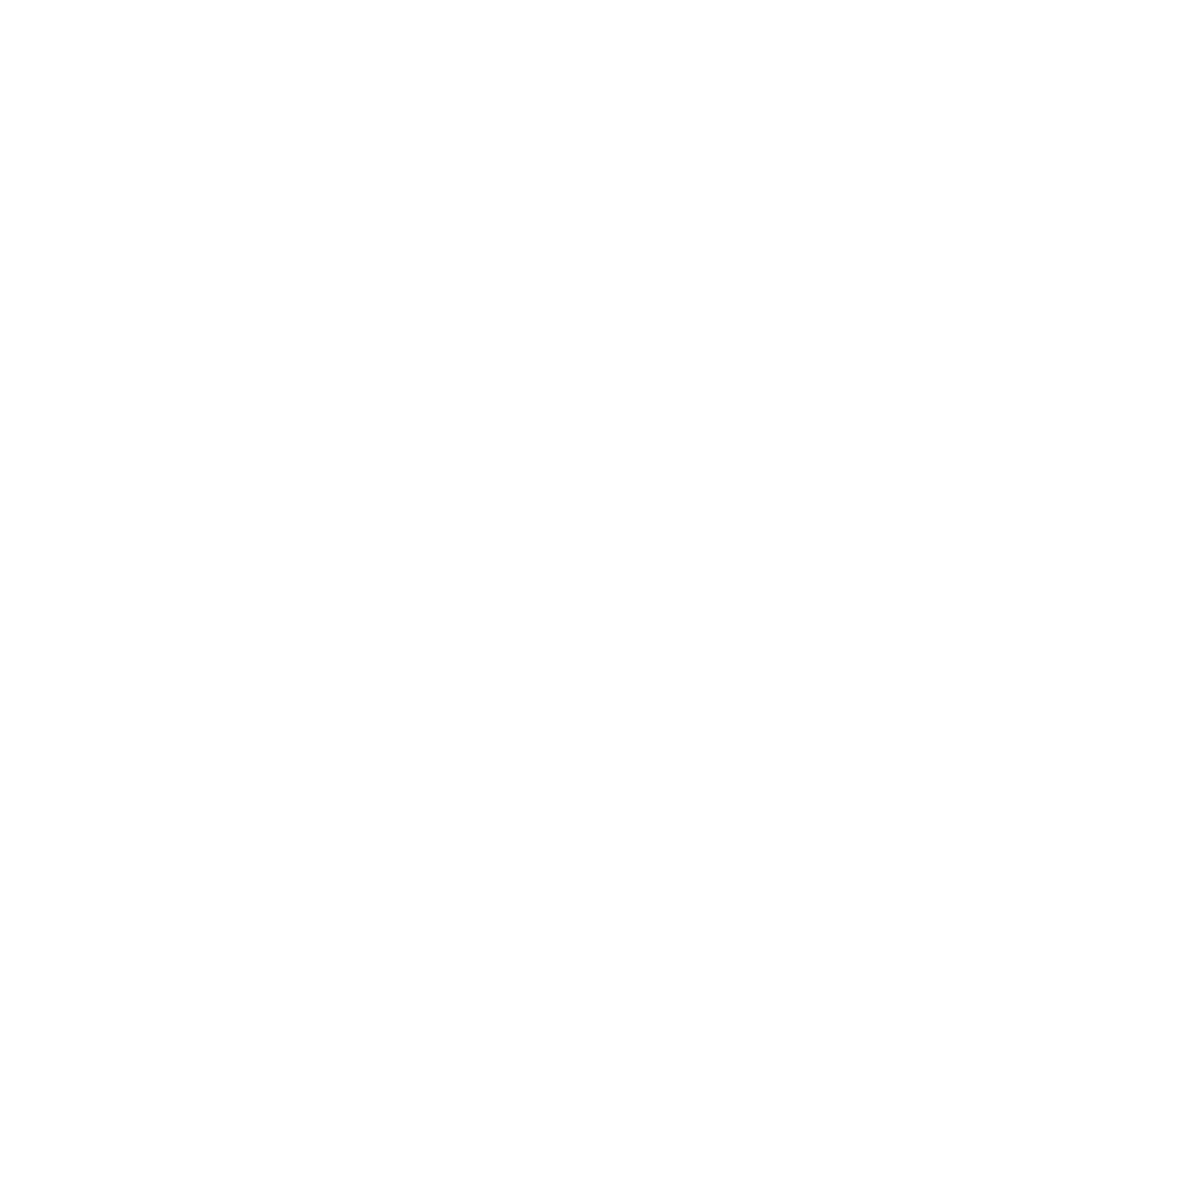

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    163649
           1       0.67      0.33      0.44       385

    accuracy                           1.00    164034
   macro avg       0.83      0.66      0.72    164034
weighted avg       1.00      1.00      1.00    164034



In [22]:
model = run_model(X_train, y_train, None)
ypred = model.predict(X_test)
show_results(y_test, ypred)

### Entrenamiento del Regresor Logístico con clases balanceadas

Ejecutando función de regresión
mostrando resultados


<IPython.core.display.Javascript object>


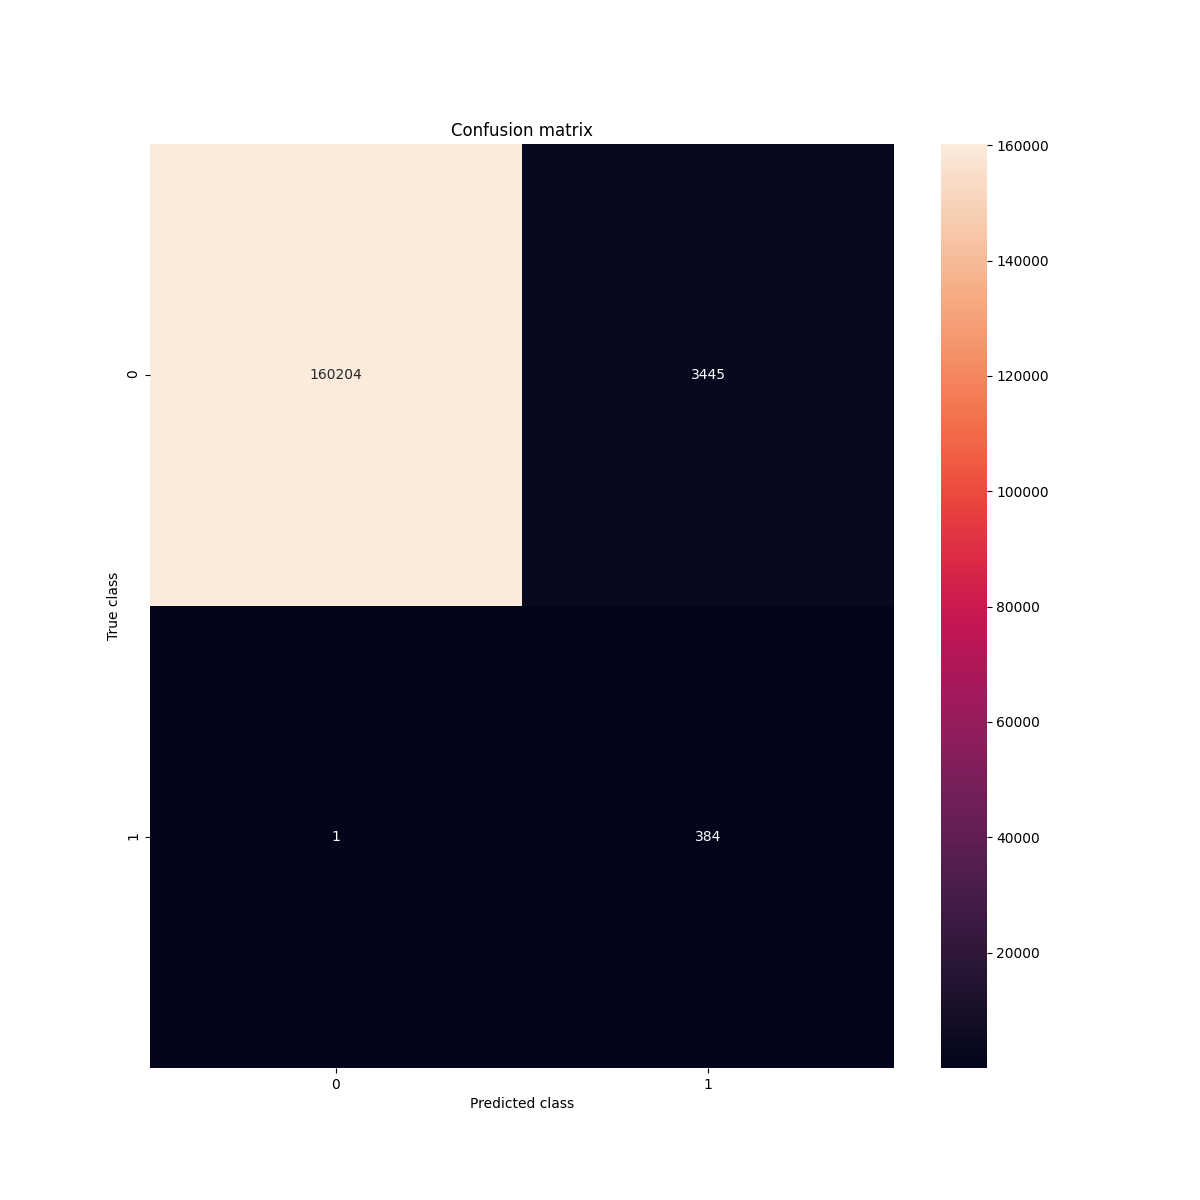

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    163649
           1       0.10      1.00      0.18       385

    accuracy                           0.98    164034
   macro avg       0.55      0.99      0.59    164034
weighted avg       1.00      0.98      0.99    164034



In [20]:
model = run_model(X_train, y_train, 'balanced')
ypred = model.predict(X_test)
show_results(y_test, ypred)

### Implementación de validación cruzada con Stratified K-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

nsplits = 5
cv = StratifiedKFold(n_splits=nsplits, shuffle=True, random_state=1)

#métricas
scoring = ['recall', 'f1', 'accuracy', 'precision', 'roc_auc']

scores = cross_validate(model, X, y, scoring=scoring, cv=cv)

In [ ]:
# report performance
print("\nMétricas luego de la validación cruzada:\n")
print("Score time: {}".format(scores['score_time']))
print("Recall: {}".format(scores['test_recall']))
print("F1 Score: {}".format(scores['test_f1']))
print("Accuracy: {}".format(scores['test_accuracy']))
print("Precision: {}".format(scores['test_precision']))
print("ROC AUC: {}".format(scores['test_roc_auc']))

## Resultados

- **Para la clase 0** (Asteroides no peligrosos) obtuvimos muy buenos resultados independiente de si las clases se encuentran balanceadas o no, ya que esta es la clase mayoritaria y el modelo aprende muy bien debido a la gran cantidad de datos.

- Podemos notar que con las clases balanceadas nuestro modelo detecta mucho mejor cada clase pudiendo predecir si los asteroides son peligrosos o no de mejor forma.


- **Para la clase 1**: 

    
    - Esta clase en la que se encuentran los asteroides peligrosos resultó ser más problemática debido a que es la clase minoritaria. Sin embargo, es la clase que más nos importa en este caso, por lo que se requirió un balanceo para aminorar este problema.

    - Exactitud (accuracy): Obtenemos un 98% de accuracy. Esto es simplemente igual a la proporción de predicciones que el modelo clasificó correctamente. Sin embargo, previamente con las clases desbalanceadas también obtuvimos un buen resultado ya que la clase mayoritaria se predice muy bien. Debido a esto optamos por tener en cuenta más métricas a la hora de evaluar el modelo. 

    - Sensibilidad (Recall): La sensibilidad, tasa de aciertos o tasa positiva real (TPR), nos dice cuántos de los casos positivos reales pudimos predecir correctamente con nuestro modelo. Con las clases balanceadas obtuvimos una mejora en la sensibilidad considerable pasando de un 33% a un 100% de efectividad. Esto es fundamental para el caso estudiado, debido a que esta métrica nos interesa cuando los falsos negativos son inaceptables y los falsos positivos pueden dejarse pasar. Como estamos prediciendo si un asteroide con ciertas características será peligroso o no debemos evitar a toda costa decir que un asteroide no es peligroso cuando enrealidad si lo es.

    - Precisión: La precisión nos dice cuántos de los casos predichos correctamente resultaron realmente positivos. Esta métrica es util en los casos en que los falsos positivos son una preocupación mayor frente a los falsos negativos. Si vemos la comparación cuando las clases están desbalanceadas a cuando las balanceamos podemos ver que el la precisión bajó de un 60% a un 10% de efectividad. Esto puede considerarse malo ya que se están detectando más falsos positivos ]que antes, sin embargo, si decimos que un asteroide es peligroso cuando en realidad no lo es no es un gran problema. Posteriormente pudimos obtener mejores resultados al usar la técnica de balanceo de **ensamble con modelos de balanceo**. 

    - También podemos notar que los falsos positivos aumentaron frente al modelo desbalanceado. sin embargo, los falsos negativos disminuyeron, lo que es mejor para nuestro modelo ya que es preferible detectar asteroides peligrosos siendo que no lo son a pasar por alto asteroides peligrosos haciendolos que si lo son. 

### Ensamble con modelos de balanceo
Este método que utiliza arboles de decisión fue el que presentó mejor rendimiento en la calificación del modelo. Sin embargo,  basta con utilizar la regresión logistica con el parametro de balanceo de las clases para obtener el rendimiento deseado con más simpleza.  
- **Para ejecutar este bloque de código debemos instalar la librería `imblearn`**. 
- Esta librería nos provee de técnicas de balanceo dentro de las cuales podemos nombrar: subsampling, oversampling, balancedbagging. 
- Para su instalación utilizamos el instalador de paquetes de python `pip`. 

   `pip install imblearn`

mostrando resultados


<IPython.core.display.Javascript object>


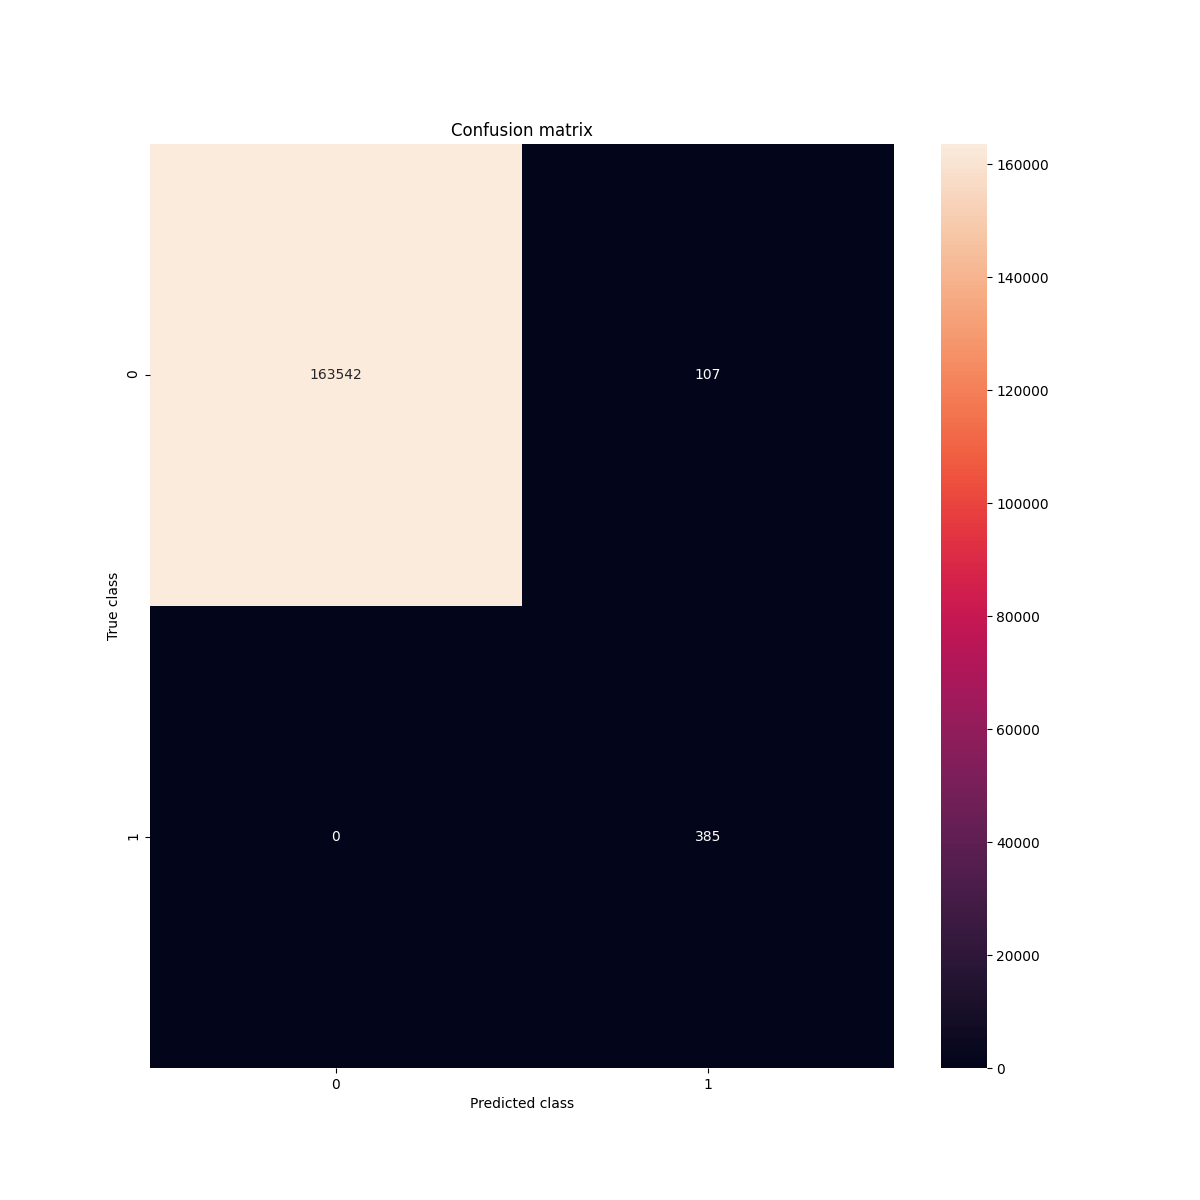

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    163649
           1       0.78      1.00      0.88       385

    accuracy                           1.00    164034
   macro avg       0.89      1.00      0.94    164034
weighted avg       1.00      1.00      1.00    164034



In [36]:
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

#smo =  NearMiss(sampling_strategy=0.5)
def exec_model_bbc(X_train, X_test, y_train, y_test):
    bbc = BalancedBaggingClassifier(sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
    bbc.fit(X_train, y_train)
    return bbc 


model2 = exec_model_bbc(X_train, X_test, y_train, y_test)
pred_y = model2.predict(X_test)

show_results(y_test, pred_y)

### Curva ROC y AUC 

<IPython.core.display.Javascript object>


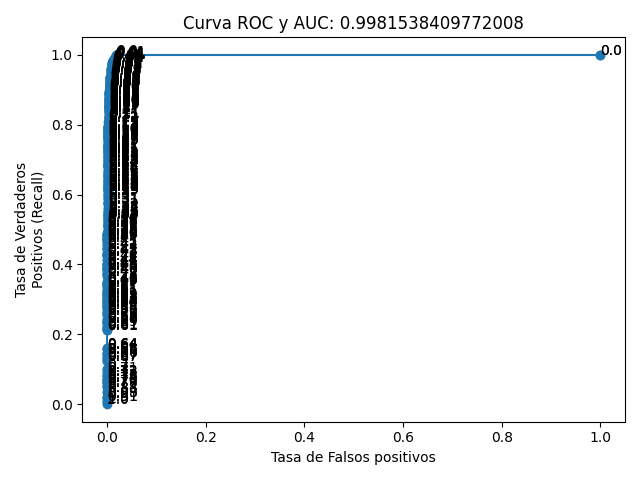

Text(0.5, 1.0, 'Curva ROC y AUC: 0.9981538409772008')

In [37]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

probability = model.predict_proba(X_test)

fpr, tpr, th = roc_curve(y_true=y_test, y_score=probability[:,1])

fig, ax = plt.subplots(tight_layout=True)
ax.plot(fpr, tpr, marker='o');
i=0
for xy in zip(fpr, tpr):                                       # <--
    ax.annotate( np.round(th[i], 2), xy=xy, textcoords='data')
    i+=1
ax.set_xlabel('Tasa de Falsos positivos')
ax.set_ylabel('Tasa de Verdaderos\nPositivos (Recall)')
ax.set_title(f'Curva ROC y AUC: {auc(fpr, tpr)}')

# 2: Hallando la respuesta de la vida

Un grupo de arqueologos ha logrado encontrar la ultima pieza de una antigua tablilla sumeria con la respuesta de la vida, y necesitan de tu ayuda para descifrar sus secretos. Normalmente, las tablillan muestran una onda tal que al ser reproducidas en un altavoz, resuenan con otro artefacto sumerio a una cierta frecuencia. Esta frecuencia despues es traducida en una palabra utilizando un diccionario especial. Desafortunadamente, la ultima onda presenta perdida de informacion y ruido, debido al transcurso de los años. 

Hasta ahora solo han podido descifrar "La Respuesta de la Vida esta en ______".

Su mision es tomar la poca informacion que se tiene de la onda y tratar de descifrar la señal original.

**Objetivo Principal**
- Entrenar un Regresor Lineal para estimar la señal original.

Se espera que el error de reconstruccion sea el menor posible. Para esto, puede medir el error promedio de las predicciones de su modelo utilizando una metrica como el Error Medio Cuadratico.

$$\frac{1}{N}\sum_{i=0}^N(y_i - \hat y_i)^2$$

donde $y_i$ es la etiqueta, $\hat y_i$ es la prediccion de su modelo y $N$ el numero de observaciones. Se recomienda analizar la informacion que se tiene para hacer predicciones mas precisas.

**El entregable** sera este mismo notebook modificado con todo el procedimiento y los comentarios. Enviar al correo indicado al inicio del documento.
Se evaluara el procedimiento y la calidad de las justificaciones, ademas de los resultados obtenidos.

**el regresor lineal simple no es suficiente**

In [2]:
%autosave 0
%matplotlib notebook
#!pip install pandas
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial
from operator import itemgetter, attrgetter
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)

Autosave disabled


<IPython.core.display.Javascript object>


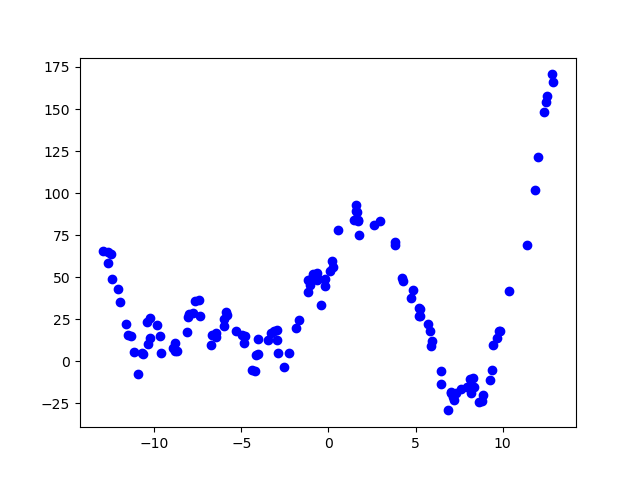

In [3]:
import operator
#agregar primer numero falta
X = np.genfromtxt("2/X.csv")
Y = np.genfromtxt("2/y.csv")
#display(X)
#display(Y)
X_ordenado= np.sort(X)
c=list(zip(X,Y))
ordenado=sorted(c, key=itemgetter(0))

Y_ordenado= np.array([])
for i in range(130):
    cambio=list(ordenado[i])
    Y_ordenado=np.append(Y_ordenado,cambio[1])


fig, ax = plt.subplots()
ax.plot(X_ordenado,Y_ordenado, 'bo')

Para poder trabajar con los datos de una forma mas ordenada, primero se ordenaron los puntos y se guardaron en nuevos arreglos llamados X_ordenado e Y_ordenados, para poder visuarlizar su comportamiento en un grafico se graficaron con puntos.

# Regresor lineal simple

<IPython.core.display.Javascript object>


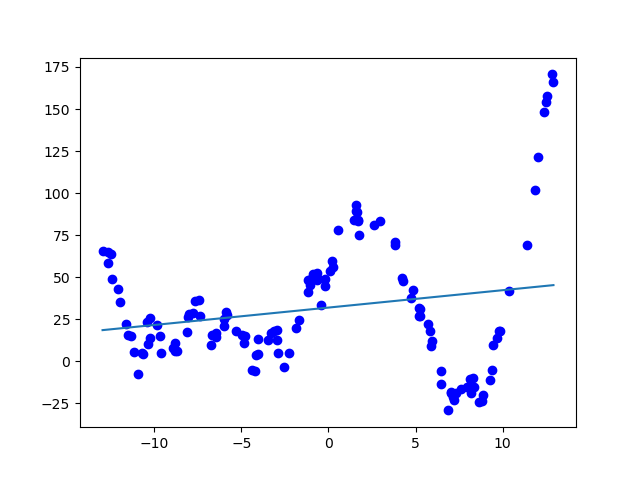

Los valores de theta son [b y w1]  [31.94222438  1.0333055 ]
El error cuadratico del regresor lineal simple es  1517.698411432933


In [51]:
X2 = np.array([X_ordenado[:]]).T
X_withones = np.hstack((np.ones((len(X2),1)), X2))
theta_hat = np.linalg.inv(X_withones.T.dot(X_withones)).dot(X_withones.T).dot(Y_ordenado)
Y_hat = X_withones.dot(theta_hat)
fig, ax = plt.subplots()
ax.plot(X_ordenado,Y_ordenado, 'bo')
ax.plot(X_ordenado,Y_hat)


#Error cuadratico del regresor lineal simple
Y_Hat=Y_hat
sum=0
for i in range(130):
    sum=((Y_ordenado[i]-Y_Hat[i])*(Y_ordenado[i]-Y_Hat[i]))+sum

Error=(1/130)*sum
print("Los valores de theta son [b y w1] ", theta_hat)
print("El error cuadratico del regresor lineal simple es ", Error)

Funcion obtenida de la regresion lineal simple: $$y_i=31.94222438   + 1.0333055 *x_i$$
Error cuadratico: $$ 1517.698411432933 $$

<IPython.core.display.Javascript object>


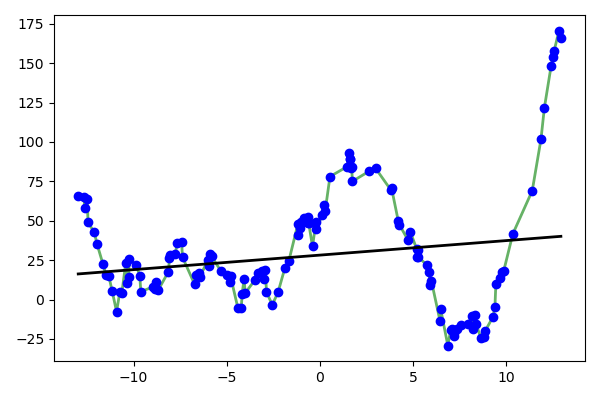

interactive(children=(IntSlider(value=1, description='G: grado del polinomio', layout=Layout(height='20px', wi…

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#M=8

plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

def update_plot(ax, M):
    ax.cla();
    ax.plot(X_ordenado,Y_ordenado, 'bo')
    model = LinearRegression()
    poly = PolynomialFeatures(degree = M) 
    Phi = poly.fit_transform(X_ordenado.reshape(-1, 1))
    P = np.random.permutation(len(X_ordenado))
    train_idx, valid_idx = P[:2*len(X_ordenado)//3], P[2*len(X_ordenado)//3:]
    theta_hat = np.linalg.lstsq(Phi[train_idx, :], Y_ordenado[train_idx], rcond=None)[0]
    ax.plot(X_ordenado, Y_ordenado, 'g-', linewidth=2, label='Modelo real', alpha=0.6, zorder=-100)
    ax.plot(X_ordenado, np.dot(poly.transform(X_ordenado.reshape(-1, 1)), theta_hat), 'k-', linewidth=2, label='Modelo aprendido')
    #Error cuadratico del regresor lineal polinomial con sklearn
    Y_Hat=np.dot(poly.transform(X_ordenado.reshape(-1, 1)), theta_hat)
    sum=0
    for i in range(130):
        sum=((Y_ordenado[i]-Y_Hat[i])*(Y_ordenado[i]-Y_Hat[i]))+sum
    Error=(1/130)*sum
    print(Error)
    print(theta_hat)
widgets.interact(update_plot, 
                 ax=widgets.fixed(ax), 
                 M=IntSlider_nice(description='G: grado del polinomio', min=1, max=16));




$$M optimo:10$$
El theta hat optimo que se encontro fue el siguiente: $$[ 6.05717611e+01  1.97060128e+01 -1.94475500e+00 -1.02573668e+00
  2.56911799e-02  1.55236486e-02 -2.52525934e-04 -9.01541551e-05
  1.95770415e-06  1.83255954e-07 -5.21671950e-09]$$
Error cuadratico: $$ 61.515419236583114 $$

Es importante también señalar que los valores obtenidos pueden variar por cada ejecución del algoritmo pero aún así los resultados no varian mucho.

## Regularización

<IPython.core.display.Javascript object>


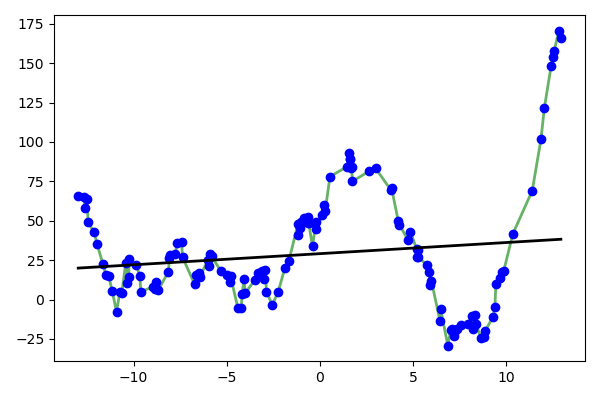

interactive(children=(IntSlider(value=1, description='G: grado del polinomio', layout=Layout(height='20px', wi…

In [53]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0)

#poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T

plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

def update_plot(ax, M, L):
    ax.cla();
     
    ax.plot(X_ordenado,Y_ordenado, 'bo')
    
    model = Ridge(alpha = L)
    #model = LinearRegression()
    poly = PolynomialFeatures(degree = M) 
    
    Phi = poly.fit_transform(X_ordenado.reshape(-1, 1))
    
    P = np.random.permutation(len(X_ordenado))
    train_idx, valid_idx = P[:2*len(X_ordenado)//3], P[2*len(X_ordenado)//3:]
    theta_hat = np.linalg.lstsq(Phi[train_idx, :], Y_ordenado[train_idx], rcond=None)[0]
    ax.plot(X_ordenado, Y_ordenado, 'g-', linewidth=2, label='Modelo real', alpha=0.6, zorder=-100)
    ax.plot(X_ordenado, np.dot(poly.transform(X_ordenado.reshape(-1, 1)), theta_hat), 'k-', linewidth=2, label='Modelo aprendido')
    #Error cuadratico del regresor con regularización.
    Y_Hat=np.dot(poly.transform(X_ordenado.reshape(-1, 1)), theta_hat)
    sum=0
    for i in range(130):
        sum=((Y_ordenado[i]-Y_Hat[i])*(Y_ordenado[i]-Y_Hat[i]))+sum
    Error=(1/130)*sum
    print(Error)
    print(theta_hat)
widgets.interact(update_plot, 
                 ax=widgets.fixed(ax), 
                 M=IntSlider_nice(description='G: grado del polinomio', min=1, max=16),
                 L=FloatSlider_nice(description='Lambda: Regularizacion', min=0, max=20, step=0.001));

$$M optimo:12$$
El theta hat optimo que se encontro fue el siguiente: $$[ 6.02116792e+01  2.12247195e+01 -1.27664679e+00 -1.21797488e+00
 -3.20826670e-02  2.21331289e-02  1.37872792e-03 -1.81152931e-04
 -1.80515996e-05  7.23297091e-07  1.05381347e-07 -1.15435786e-09
 -2.25973906e-10]$$
Error cuadratico: $$ 59.81870179072133 $$

Es importante también señalar que los valores obtenidos pueden variar por cada ejecución del algoritmo pero aún así los resultados no varian mucho.

# ERROR CUADRATICO ANALISIS

Error cuadratico regresor lineal: $$ 1517.698411432933 $$
Error cuadratico del regresor lineal polinomial con sklearn: $$ 61.515419236583114 $$
Error cuadratico del regresor con regularización: $$ 59.81870179072133 $$